In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df1 = pd.read_csv('energy_consumption_levels.csv')

In [3]:
df1.head(505)

,3_levels,5_levels,7_levels,consumption,temperature,hour_of_day,day_of_week,day_of_month,month_of_year
0,1,1,1,0.255,-6.0,1,5,1,1
1,1,1,1,0.264,-6.9,2,5,1,1
2,1,1,1,0.253,-7.1,3,5,1,1
3,1,1,1,0.250,-7.2,4,5,1,1
4,1,1,1,0.234,-7.5,5,5,1,1
...,...,...,...,...,...,...,...,...,...
500,3,4,5,0.816,-10.5,21,4,21,1
501,2,2,3,0.594,-11.7,22,4,21,1
502,1,2,2,0.390,-11.0,23,4,21,1
503,1,1,1,0.324,-13.7,24,4,21,1


In [4]:
df1['hour_of_day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [5]:
df1['day_of_month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [6]:
df1['month_of_year'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [7]:
df1.shape

(8784, 9)

In [8]:
df1.columns.values

array(['3_levels', '5_levels', '7_levels', 'consumption', 'temperature',
       'hour_of_day', 'day_of_week', 'day_of_month', 'month_of_year'],
      dtype=object)

In [9]:
df1.dtypes

3_levels           int64
5_levels           int64
7_levels           int64
consumption      float64
temperature      float64
hour_of_day        int64
day_of_week        int64
day_of_month       int64
month_of_year      int64
dtype: object

In [10]:
df1.dtypes.value_counts()

int64      7
float64    2
Name: count, dtype: int64

In [11]:
df1.isnull().sum()

3_levels         0
5_levels         0
7_levels         0
consumption      0
temperature      0
hour_of_day      0
day_of_week      0
day_of_month     0
month_of_year    0
dtype: int64

In [12]:
df1.describe()

,3_levels,5_levels,7_levels,consumption,temperature,hour_of_day,day_of_week,day_of_month,month_of_year
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,2.001480,3.001138,4.003415,0.671343,11.617281,12.500000,4.008197,15.756831,6.513661
std,0.817308,1.414616,2.000623,0.258330,10.309197,6.922581,1.998047,8.812031,3.451430
min,1.000000,1.000000,1.000000,0.174327,-21.800000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,0.395000,4.500000,6.750000,2.000000,8.000000,4.000000
50%,2.000000,3.000000,4.000000,0.740000,11.000000,12.500000,4.000000,16.000000,7.000000
75%,3.000000,4.000000,6.000000,0.844000,19.100000,18.250000,6.000000,23.000000,10.000000
max,3.000000,5.000000,7.000000,1.360000,36.500000,24.000000,7.000000,31.000000,12.000000


In [13]:
df1.isna().sum()

3_levels         0
5_levels         0
7_levels         0
consumption      0
temperature      0
hour_of_day      0
day_of_week      0
day_of_month     0
month_of_year    0
dtype: int64

**Question 1 - Box Plot**

Box plot is used to find the outliers from the data set

In [14]:
data = df1.columns.to_list()

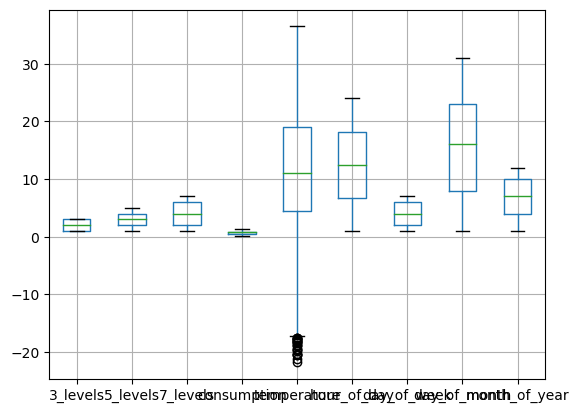

In [15]:
df1.boxplot(column=data)
plt.show()

here the outliers are found in temperature (using IQR -TRIMMING METHOD)

In [16]:
Q1 = df1['temperature'].quantile(0.25)
Q3 = df1['temperature'].quantile(0.75)

In [17]:
IQR = Q3-Q1

In [18]:
lowerlimit = Q1-1.5*IQR
upperlimit = Q3+1.5*IQR

In [19]:
upperlimit

41.0

In [20]:
lowerlimit

-17.400000000000002

In [21]:
df1.shape

(8784, 9)

In [22]:
df1[df1['temperature']<=lowerlimit].value_counts().count()

25

Here outliers are present in 25 columns of temperature

Applied Trimming method

In [23]:
newdf = df1[df1['temperature']>=lowerlimit]

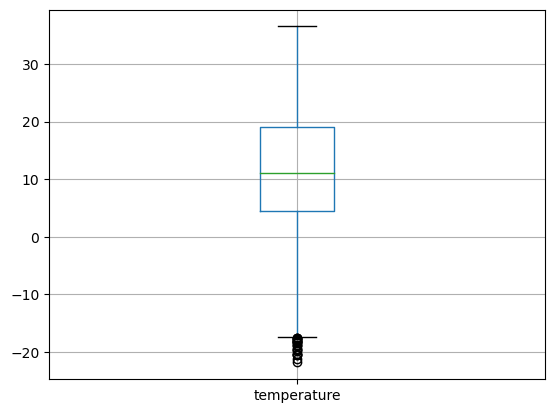

In [24]:
# Before
df1.boxplot(column=['temperature'])
plt.show()

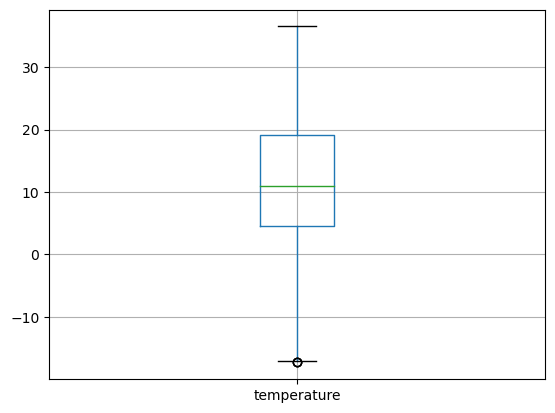

In [25]:
#After
newdf.boxplot(column=['temperature'])
plt.show()

**Question 2**

In [26]:
df1.duplicated().sum()

0

**Question 3**

In [27]:
df1['Standard_datetime'] = pd.to_datetime(
    pd.DataFrame({
        'year':2023,
        'day':df1['day_of_month'],
        'month':df1['month_of_year'],
        'hour':df1['hour_of_day']
    }),
    errors='coerce', format='%b-%y'
)

In [28]:
df1.head()

,3_levels,5_levels,7_levels,consumption,temperature,hour_of_day,day_of_week,day_of_month,month_of_year,Standard_datetime
0,1,1,1,0.255,-6.0,1,5,1,1,2023-01-01 01:00:00
1,1,1,1,0.264,-6.9,2,5,1,1,2023-01-01 02:00:00
2,1,1,1,0.253,-7.1,3,5,1,1,2023-01-01 03:00:00
3,1,1,1,0.250,-7.2,4,5,1,1,2023-01-01 04:00:00
4,1,1,1,0.234,-7.5,5,5,1,1,2023-01-01 05:00:00
